# Predicting dynamics of exchange rate of US dollar to ruble with ML algorithms

#### dataset is taken from: http://cbr.ru/currency_base/dynamics/
##### period of time: from 01.01.2018 to 31.12.2019

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## Step 1: Observing and manipulating the dataset

In [2]:
dataframe = pd.read_excel("usd_rate.xlsx")

In [3]:
dataframe.head()

,nominal,data,curs,cdx
0,1,2018-01-10,57.0463,Доллар США
1,1,2018-01-11,56.8734,Доллар США
2,1,2018-01-12,56.9957,Доллар США
3,1,2018-01-13,56.6019,Доллар США
4,1,2018-01-16,56.3569,Доллар США


In [4]:
dataframe.curs.describe()

count    493.000000
mean      63.770695
std        3.108680
min       55.671700
25%       62.768600
50%       64.246900
75%       65.812900
max       69.974400
Name: curs, dtype: float64

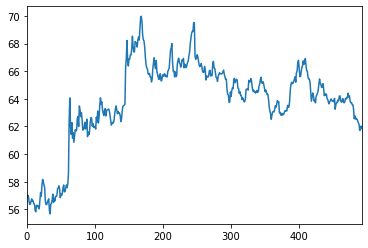

In [5]:
dataframe.curs.plot()

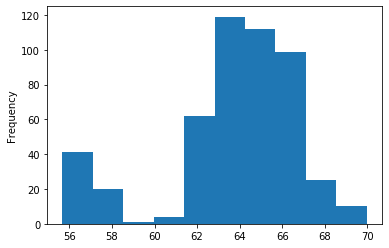

In [6]:
dataframe.curs.plot.hist()

In [7]:
money = dataframe.curs

In [8]:
past = 7 * 4 # (=28) taking data from the last 4 weeks 
future = 7 # for predicting the future data for 1 week ahead

In [9]:
len(money) # observing the number of days

493

In [10]:
start = past # starting from the 29th day 
end = len(money) - future # ending on the 487 day

In [11]:
print(start, end)

28 486


In [12]:
new_df = []
# creating a new array where each day has information
# about the prior 28 days and future 7 days in terms of currancy
for i in range(start, end):
    all_columns = money[(i-past):(i+future)]
    new_df.append(list(all_columns))

In [13]:
# giving names to past days
past_columns = [f"past_{i}" for i in range(past)]
# giving names to future days
future_columns = [f"future_{i}" for i in range(future)]
# creating a new dataframe with all the necessary data
transformed_df = pd.DataFrame(new_df, columns=(past_columns+future_columns))

In [14]:
transformed_df.head()

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,57.0463,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,...,57.7701,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717
1,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,...,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742
2,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,...,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334
3,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,...,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616
4,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,...,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000


In [15]:
# test data for fitting the model
X = transformed_df[past_columns][:-1]
y = transformed_df[future_columns][:-1] 

In [16]:
y

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717
1,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742
2,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334
3,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616
4,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000
...,...,...,...,...,...,...,...
452,63.2257,62.5544,62.7686,62.5326,62.5831,62.5283,62.4071
453,62.5544,62.7686,62.5326,62.5831,62.5283,62.4071,62.2499
454,62.7686,62.5326,62.5831,62.5283,62.4071,62.2499,62.1673
455,62.5326,62.5831,62.5283,62.4071,62.2499,62.1673,61.7164


In [17]:
# test data for valuating the model
X_test = transformed_df[past_columns][-1:]
y_test = transformed_df[future_columns][-1:] 

## Step 2: Using Linear Regression on the dataset

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
LinReg = LinearRegression()

In [20]:
LinReg.fit(X, y) # training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
prediction = LinReg.predict(X_test)

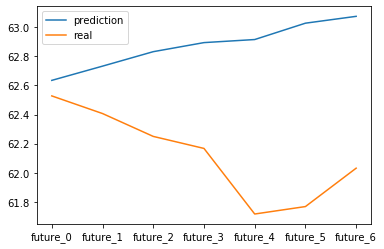

In [22]:
plt.plot(prediction[0], label = "prediction")
plt.plot(y_test.iloc[0], label ="real" )
plt.legend()

In [23]:
from sklearn.metrics import mean_absolute_error

In [24]:
# mean absolute error of the prediction
mean_absolute_error(prediction[0], y_test.iloc[0])

0.7495339183028429

## Step 3: Using k-Nearest Neighbors Regression on the dataset

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
KNN = KNeighborsRegressor(n_neighbors=4)

In [27]:
KNN.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [28]:
prediction = KNN.predict(X_test)

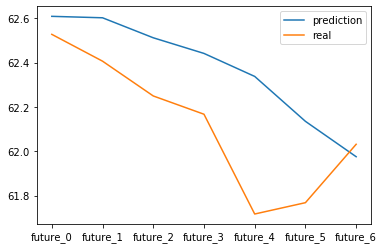

In [29]:
plt.plot(prediction[0], label = "prediction")
plt.plot(y_test.iloc[0], label ="real" )
plt.legend()

In [30]:
# mean absolute error of the prediction
mean_absolute_error(prediction[0], y_test.iloc[0])

0.2658035714285723

## Step 4: Using Multilayer Perceptron Regressor on the dataset

In [31]:
from sklearn.neural_network import MLPRegressor

In [32]:
MLP = MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes=(100,50,30))
MLP.fit(X, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 50, 30), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [33]:
prediction = MLP.predict(X_test)

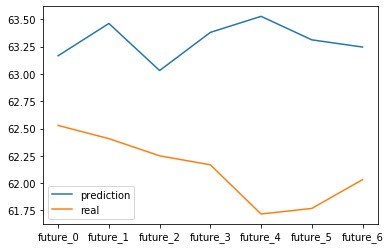

In [34]:
plt.plot(prediction[0], label = "prediction")
plt.plot(y_test.iloc[0], label ="real" )
plt.legend()

In [35]:
# mean absolute error of the prediction
mean_absolute_error(prediction[0], y_test.iloc[0])

1.1803440356077814

## Step 5: Using GridSearch and Cross Validation

In [36]:
# Grid search - searching the parameter network
# Cross validation - techique for evaluating the model

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [38]:
RFR = RandomForestRegressor()

In [39]:
# gridsearch and cross validation setup
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [2, 5, 10],
}

GS = GridSearchCV(RFR, param_grid, scoring='neg_mean_absolute_error', cv=4, n_jobs=-1)

In [40]:
GS.fit(X,y)

C:\ProgramData\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10],
        

In [41]:
GS.best_params_ # best parameters

{'max_depth': 2, 'n_estimators': 50}

In [42]:
GS.best_score_ # min error

-1.433067451194318

In [43]:
GS.cv_results_

{'mean_fit_time': array([ 0.23853445,  0.4025141 ,  0.92222196,  2.07185555,  3.98729265,
         0.38287288,  0.77579778,  1.55587023,  3.73252934,  8.40969455,
         0.64398319,  1.24022847,  2.58974308,  7.44014418, 15.32963884]),
 'std_fit_time': array([0.02103644, 0.00612768, 0.01585566, 0.02096888, 0.02554372,
        0.01798853, 0.01058884, 0.03558437, 0.0410227 , 0.04485963,
        0.027071  , 0.00881123, 0.09468657, 0.14395279, 0.07835136]),
 'mean_score_time': array([0.01077038, 0.01549095, 0.03722882, 0.06971031, 0.12579894,
        0.00999498, 0.01599079, 0.03148216, 0.0669623 , 0.12847793,
        0.01174343, 0.0152418 , 0.03399831, 0.10273355, 0.12946069]),
 'std_score_time': array([0.00148029, 0.00165774, 0.0132281 , 0.00860809, 0.01199517,
        0.00099921, 0.00186967, 0.0090086 , 0.00706642, 0.00768458,
        0.00267976, 0.0014781 , 0.00524271, 0.02774587, 0.00947525]),
 'param_max_depth': masked_array(data=[2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10],
 

In [44]:
BestModel = GS.best_estimator_

In [45]:
prediction = BestModel.predict(X_test)

In [46]:
# prediction with the most accurate parameters of the listed above
prediction

array([[63.3255968 , 63.3792752 , 63.40128113, 63.43228364, 63.46301571,
        63.49094035, 63.52205644]])

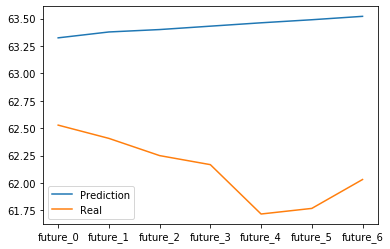

In [47]:
plt.plot(prediction[0], label = 'Prediction')
plt.plot(y_test.iloc[0], label = 'Real')
plt.legend()